<h1 align="center">Compte rendu TP1</h1>

## Introduction

Introduction Le domaine du Machine Learning offre un cadre d'analyse puissant pour la modélisation et la prédiction de phénomènes complexes. Dans le cadre de ce travail pratique, nous explorerons différentes approches de modélisation à partir d'un ensemble de données générées. Le jeu de données en question est constitué de variables aléatoires X et Y, où X suit une loi uniforme sur l'intervalle [0, 1] et Y est défini comme f(X)+ε. La fonction f(x)=cos(2x) représente la relation déterministe sous-jacente, et ε est un bruit gaussien.

L'objectif principal de ce travail pratique est de mettre en œuvre deux approches distinctes pour estimer les paramètres optimaux du modèle sous-jacent. La première méthode que nous explorerons est la régression linéaire, qui tentera d'approximer la fonction f(x) à l'aide d'une forme linéaire. La seconde méthode utilisera une approche non paramétrique avec un estimateur à noyau, qui offre une flexibilité accrue pour s'adapter à des relations non linéaires.

Pour évaluer les performances de nos modèles, nous étudierons l'évolution de l'erreur de la méthode de régression linéaire à mesure que le nombre d'observations augmente. Pour ce faire, nous diviserons notre ensemble de données initial en trois groupes distincts : un ensemble d'entraînement, un ensemble de test et un ensemble de validation. Nous commencerons par générer 30 couples de données et étendrons progressivement notre ensemble pour évaluer la capacité de généralisation des modèles.

Cette approche méthodique nous permettra d'analyser et de comparer les performances de la régression linéaire et de l'estimateur à noyau dans la modélisation de relations complexes, en mettant en lumière les avantages et les limitations de chaque méthode.

## Génération des couples (X, Y)
Dans la première question, on va générer 30 points du plan (x, y). Pour cela, on va utiliser la fonction rand(1, 30) pour générer les variables x qui suivent la loi uniforme sur [0, 1], et on va généré les Y avec la formule cos(2x) + 0.01 * (-1 + (2 * randn(length(X), 1))), c'est le bruit gaussien qu'on va utiliser.

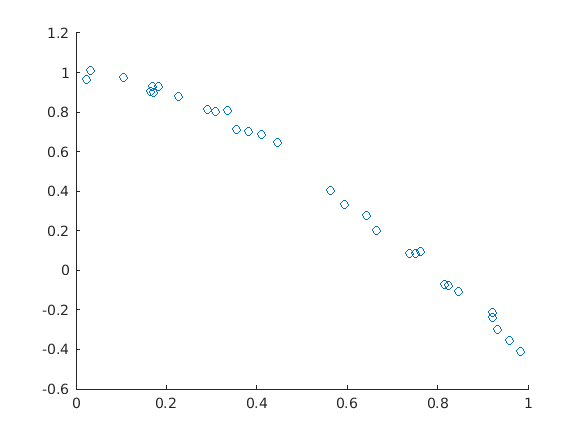

In [88]:
% Génère 30 échantillons de la loi uniforme sur [0, 1]
clear all;
X = rand(1, 30) ; 
X = X';
% Calcul de y = cos(2x) + bruit gaussien
Y = cos(2*X) + 0.01 * (-1 + (2 * randn(length(X), 1)));
% figure;
scatter(X, Y);

## Séparation des données  

Maintenant on va séparer les donnes en trois ensembles, l’entraînement, le test et la validation.

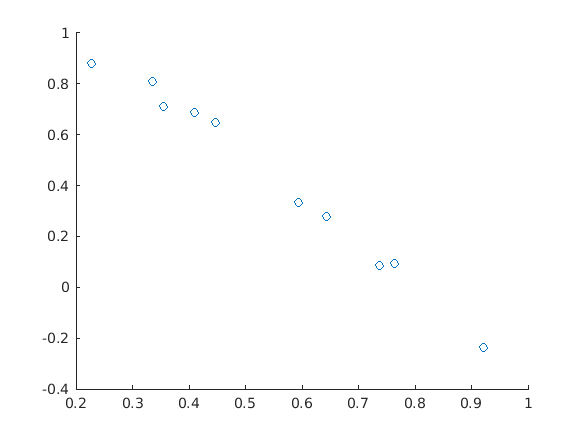

In [89]:
%Prendre le tier de nombre des points
tier = length(X) / 3;
%base d'entrainment
entr_x = X(1:tier);
entr_y = Y(1:tier);
%base de validarion
valid_x = X(tier+1:2*tier);
valid_y = Y(tier+1:2*tier);
%base de test
test_x = X(2*tier+1:3*tier);
test_y = Y(2*tier+1:3*tier);

scatter(entr_x, entr_y);

## Régression linéaire simple

Dans cette question, on va utiliser les formules  de paramètres obtenue dans la question 1 de TD1 sur la base d’entraînement .

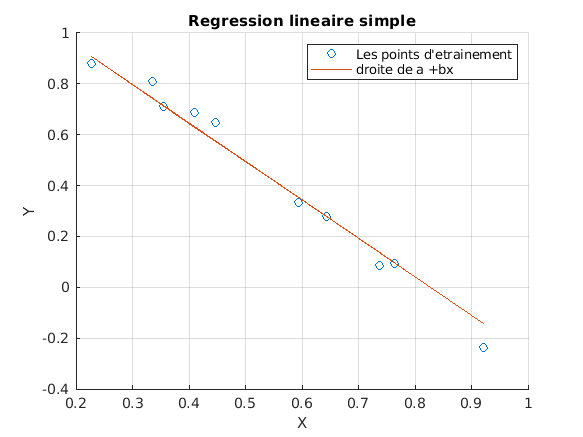

In [90]:
%Definition de x_bar
X_bar = mean(entr_x);
%Definition de y_bar
Y_bar = mean(entr_y);
%defintion de parametre b
b = sum((Y - Y_bar) .* (X - X_bar)) / sum((X - X_bar) .^ 2);
%definition de parametre a
a = Y_bar - (b * X_bar);
% creation du vecteur w qui contient les parametres
w = [b, a];
% resolution de system y = a + bx et l'obtention de vecteur y estimee
y = polyval(w, entr_x);
% visualisation des donnees
scatter(entr_x, entr_y, "DisplayName", "Les points d'etrainement");
hold on
plot(entr_x, y, "DisplayName", "droite de a +bx");
legend("show");
xlabel("X");
ylabel("Y");
title("Regression lineaire simple");
grid on;
hold off;

## Équation normale de la régression linéaire

Pour estimer les coefficients d'une régression polynomiale de degré p à l'aide de l'équation normale de la régression linéaire, on peut étendre la matrice des caractéristiques X  pour inclure les puissances successives de la variable indépendante. Supposons que X soit une matrice de conception où chaque ligne représente une observation et chaque colonne représente une variable.

1. Ajoutez des colonnes pour les puissances successives de la variable indépendante jusqu'à p.
2. Appliquez l'équation normale           avec la nouvelle matrice X.

Cela permettra d'estimer les coefficients d'un modèle polynomial de degré p. Le vecteur B contiendra les coefficients optimaux pour les différentes puissances de la variable indépendante, permettant ainsi de modéliser une relation polynomiale.

## Implémentation de l’équation normale de régression

Cette question sert à implémenter la formule qu’on a vu dans la question précédente pour estimer les coefficients du polynôme de régression de degré 1 à 15 et représenter les fonctions obtenues sur un graphe. 

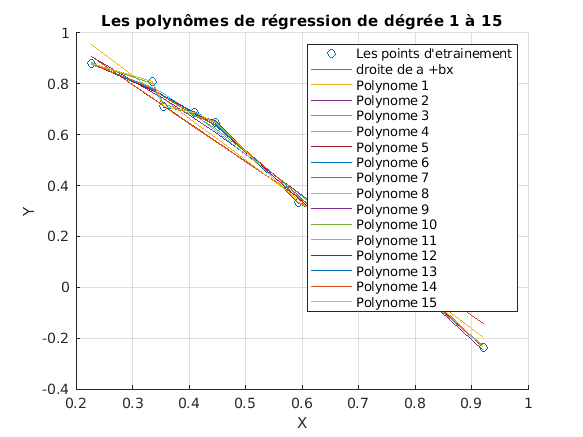

In [91]:
% % ordonner les vecteurs de x et y pour éviter les problèmes dans les polynômes
% % pour les vecteurs d’entraînement
% [entr_x, indexes] = sort(entr_x);
% entr_y = entr_y(indexes);
% % calcule des paramètres de 1 a 15 de meme facon precedent
% total_degrees = 1:15;
% for total_degree = total_degrees
%     degrees = 0:total_degree;
%     for i = 1:length(entr_x)
%         for p = degrees
%             polynome_p(i, p + 1) = entr_x(i) .^ p;
%         end
%     end    
% B = (polynome_p' * polynome_p) \ (polynome_p' * entr_y);
% % calcule de y prédite avec les paramètre de degree p
% y_p = polynome_p * B;
% % Calcule de risque empirique de regression de base d’entraînement
% entr_erreurs(total_degree, 1) = norm(entr_y - y_p);;
% ordonner les vecteurs de x et y pour éviter les problèmes dans les polynômes
% pour les vecteurs d’entraînement
[entr_x, indexes] = sort(entr_x);
entr_y = entr_y(indexes);
% pour les vecteurs de test
[test_x, indexes] = sort(test_x);
test_y = test_y(indexes);
% calcule des paramètres de 1 a 15 de meme facon precedent
total_degrees = 1:15;
for total_degree = total_degrees
    degrees = 0:total_degree;
    for i = 1:length(entr_x)
        for p = degrees
            polynome_p(i, p + 1) = entr_x(i) .^ p;
            % creation du vecteur test et le remplir avec les puissances
            test_p(i, p + 1) = test_x(i) .^ p;
        end
    end    
B = (polynome_p' * polynome_p) \ (polynome_p' * entr_y);
% calcule de y prédite avec les paramètre de degree p
y_p = polynome_p * B;
y_test_p = test_p * B;
% Calcule de risque empirique de regression de base de test
entr_erreurs(total_degree, 1) = norm(entr_y - y_p);
test_erreurs(total_degree, 1) = norm(test_y - y_test_p);
hold on;
plot(entr_x, y_p, 'DisplayName', ['Polynome ', num2str(p)]);
hold off;
end
legend("show");
xlabel("X");
ylabel("Y");
title("Les polynômes de régression de dégrée 1 à 15");

## Calcul d’erreur

On va visualiser l'erreur qu'on a déjà calculer dans la question précédente. 

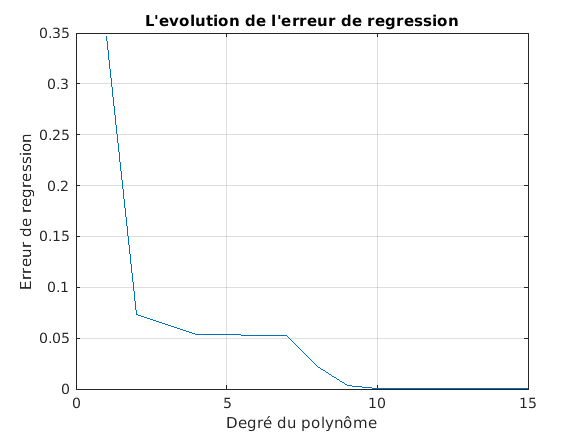

In [78]:
plot(total_degrees, entr_erreurs);
xlabel("Degré du polynôme");
ylabel("Erreur de regression");
title("L'evolution de l'erreur de regression");
grid on;

On constate que l’erreur diminue lorsque le degré du polynôme augmente.

## Étude de capacité de généralisation des fonctions de régression

Dans le question prochaine, on va appliquer les méthodes de régression dur la base de test pour voir la capacité de prédiction de ces méthodes.

## Calcul de risque empirique de régression sur la base de test

Dans cette question, on va appliquer l’équation normale de régression et on va utiliser les coefficients obtenues par cette formule estimées sur les donnes d’entraînement pour calculer les prédictions de la base de test, puis on va calculer le risque empirique de régression pour chaque fonction.

In [57]:
% ordonner les vecteurs de x et y pour éviter les problèmes dans les polynômes
% pour les vecteurs d’entraînement
[entr_x, indexes] = sort(entr_x);
entr_y = entr_y(indexes);
% pour les vecteurs de test
[test_x, indexes] = sort(test_x);
test_y = test_y(indexes);
% calcule des paramètres de 1 a 15 de meme facon precedent
total_degrees = 1:15;
for total_degree = total_degrees
    degrees = 0:total_degree;
    for i = 1:length(entr_x)
        for p = degrees
            polynome_p(i, p + 1) = entr_x(i) .^ p;
            % creation du vecteur test et le remplir avec les puissances
            test_p(i, p + 1) = test_x(i) .^ p;
        end
    end    
B = (polynome_p' * polynome_p) \ (polynome_p' * entr_y);
% calcule de y prédite avec les paramètre de degree p
y_p = polynome_p * B;
y_test_p = test_p * B;
% Calcule de risque empirique de regression de base de test
entr_erreurs(total_degree, 1) = norm(entr_y - y_p);
test_erreurs(total_degree, 1) = norm(test_y - y_test_p);
end

Incorrect dimensions for matrix multiplication. Check that the number of columns in the first matrix matches the number of rows in the second matrix. To operate on each element of the matrix individually, use TIMES (.*) for elementwise multiplication.

## Visualisation de l’évolution de l’erreur

Maintenant on va représenter l’évolution des erreurs d’entraînement et de test sur la même figure.


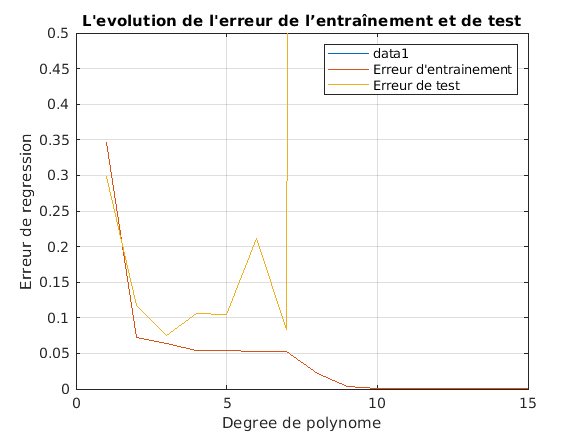

In [79]:
hold on;
plot(total_degrees, entr_erreurs, 'DisplayName', "Erreur d'entrainement");
hold on;
plot(total_degrees, test_erreurs, 'DisplayName', "Erreur de test");
hold off;
legend("show");
xlabel("Degree de polynome");
ylabel("Erreur de regression");
title("L'evolution de l'erreur de l’entraînement et de test");
ylim([0, 0.5]);

On observe que lorsque le degré de polynôme est petit, les erreurs d’entraînement et de test sont presque égaux, quand le degré augmente, les erreurs d’entraînement diminue, et celais de test augmente, alors le degré optimale est celui qui minimise l’erreur de test.


## Augmentation du nombre des données 

On va augmenter le nombre des donnes générées et on va regarder l’influence de cette incrémentation sure l’évolution d’erreur.


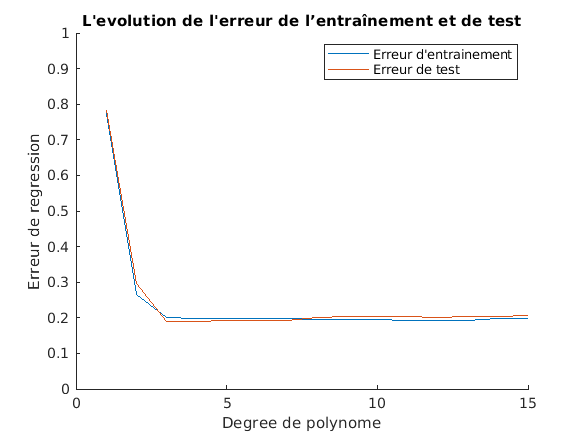

In [81]:
% Génère 300 échantillons de la loi uniforme sur [0, 1]
clear all;
X2 = rand(1, 300) ; 
X2 = X2';
% Calcul de y = cos(2x) + bruit gaussien
Y2 = cos(2*X2) + 0.01 * (-1 + (2 * randn(length(X2), 1)));

%Prendre le tier de nombre des points
tier = length(X2) / 3;
%base d'entrainment
entr_x2 = X2(1:tier);
entr_y2 = Y2(1:tier);
%base de validarion
valid_x2 = X2(tier+1:2*tier);
valid_y2 = Y2(tier+1:2*tier);
%base de test
test_x2 = X2(2*tier+1:3*tier);
test_y2 = Y2(2*tier+1:3*tier);

% ordonner les vecteurs de x et y pour éviter les problèmes dans les polynômes
% pour les vecteurs d’entraînement
[entr_x2, indexes] = sort(entr_x2);
entr_y2 = entr_y2(indexes);
% pour les vecteurs de test
[test_x2, indexes] = sort(test_x2);
test_y2 = test_y2(indexes);
% calcule des paramètres de 1 a 15 de meme facon precedent
total_degrees = 1:15;
for total_degree = total_degrees
    degrees = 0:total_degree;
    for i = 1:length(entr_x2)
        for p = degrees
            polynome_p2(i, p + 1) = entr_x2(i) .^ p;
            % creation du vecteur test et le remplir avec les puissances
            test_p2(i, p + 1) = test_x2(i) .^ p;
        end
    end    
B2 = (polynome_p2' * polynome_p2) \ (polynome_p2' * entr_y2);
% calcule de y prédite avec les paramètre de degree p
y_p2 = polynome_p2 * B2;
y_test_p2 = test_p2 * B2;
% Calcule de risque empirique de regression de base de test
entr_erreurs2(total_degree, 1) = norm(entr_y2 - y_p2);
test_erreurs2(total_degree, 1) = norm(test_y2 - y_test_p2);
end
hold on;
plot(total_degrees, entr_erreurs2, 'DisplayName', "Erreur d'entrainement");
hold on;
plot(total_degrees, test_erreurs2, 'DisplayName', "Erreur de test");
hold off;
legend("show");
xlabel("Degree de polynome");
ylabel("Erreur de regression");
title("L'evolution de l'erreur de l’entraînement et de test");
ylim([0, 1]);

On voit que la valeur d’erreur a augmenté pour les deux, et aussi on observe que la courbe de test prend presque la même allure que celle d’entraînement.

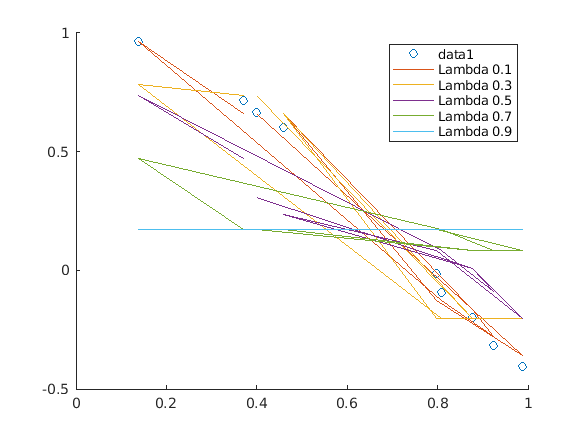

In [86]:
%definition de noyeau 
% Paramètre de la largeur du noyau
lambdas = 0.1:0.2:1;

% Calculer la matrice de noyau
N = length(entr_x);
K = zeros(N, N);
scatter(entr_x, entr_y);
for lambda = lambdas
for i = 1:N
    for j = 1:N
        % Calculer la distance euclidienne (dans ce cas, c'est simplement la différence)
        distance = abs(entr_x(i) - entr_x(j));

        % Appliquer la formule du noyau
        if distance < lambda
            K(i, j) = 1;
        else
            K(i, j) = 0;
        end
    end
end

y_predit = (sum(K .* entr_y) ./ sum(K))';

hold on;
plot(entr_x, y_predit, 'DisplayName', ['Lambda ', num2str(lambda)]);

hold off
end
legend("show")